In [9]:
import os
import argparse
import numpy as np
import time
import matplotlib.pyplot as pyplot
import csv

from main import run_direct_estimation, run_importance_sampling, run_adaptive_importance_sampling, run_multiple_grasps, run_single_grasp

In [10]:
# Define parameters for estimation methods
trial_size_increment = 5
max_trial_exp = 3
gui = False
hill = True
policy_file = './best_hill_climbing_policy.pkl'
depth = 1000
np.random.seed(42)

In [11]:
# Run direct estimation
# stores n, p_failure, std_error, runtime
results_de = {'n':[], 'p_fail':[], 'std_error':[], 'runtime':[]}
for i in range(max_trial_exp):
    start_time = time.time_ns()
    trials = trial_size_increment**(i + 1)
    p_failure_de, std_error_de = run_direct_estimation(
        trials, 
        gui,
        hill,  # Pass hill climbing flag
        policy_file if hill else None  # Pass policy file only if using hill climbing
    )
    end_time = time.time_ns()
    runtime_ns = end_time - start_time
    results_de['n'].append(trials)
    results_de['p_fail'].append(p_failure_de)
    results_de['std_error'].append(std_error_de)
    results_de['runtime'].append(runtime_ns)
    print(f"\nFinal Results:")
    print(f"Failure Probability: {p_failure_de:.4f} ± {std_error_de:.4f}")
    print(f"95% Confidence Interval: [{p_failure_de - 1.96*std_error_de:.4f}, {p_failure_de + 1.96*std_error_de:.4f}]")


Running direct estimation with 5 trials...
Using hill climbing policy
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Starting direct estimation with 5 trials...
Completed 0/5 trials...


/Users/jazz/opt/anaconda3/envs/cs224n/lib/python3.10/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")



Results:
Failure Probability: 0.0000 ± 0.0000
Based on 0 failures in 5 trials
Results saved to results/direct_estimation_results_hill_climbing.csv

Final Results:
Failure Probability: 0.0000 ± 0.0000
95% Confidence Interval: [0.0000, 0.0000]

Running direct estimation with 25 trials...
Using hill climbing policy
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Starting direct estimation with 25 trials...
Completed 0/25 trials...

Results:
Failure Probability: 0.0000 ± 0.0000
Based on 0 failures in 25 trials
Results saved to results/direct_estimation_results_hill_climbing.csv

Final Results:
Failure Probability: 0.0000 ± 0.0000
95% Confidence Interval: [0.0000, 0.0000]

Running direct estimation with 125 trials...
Using hill climbing policy
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Starting direct estimation with 125 trials...
Completed 0/125 trials...
Completed 50/125 trials...
Completed 100/125 trials...

Results:
Failure Probability: 0.0160 ± 0

In [12]:
# Run importance sampling
# stores n, p_failure, std_error, runtime
results_ims = {'n':[], 'p_fail':[], 'std_error':[], 'runtime':[]}
for i in range(max_trial_exp):
    start_time = time.time_ns()
    trials = trial_size_increment**(i+1)
    failure_prob, std_error = run_importance_sampling(
            n_trials=trials,
            d=depth,
            gui_mode=gui,
            use_hill_climbing=hill,
            policy_file=policy_file if hill else None
        )
    end_time = time.time_ns()
    runtime_ns = end_time - start_time
    results_ims['n'].append(trials)
    results_ims['p_fail'].append(failure_prob)
    results_ims['std_error'].append(std_error)
    results_ims['runtime'].append(runtime_ns)
    print(f"\nFinal Results:")
    print(f"Estimated Failure Probability: {failure_prob:.4f}")
    print(f"95% Confidence Interval: [{failure_prob - 1.96*std_error:.4f}, {failure_prob + 1.96*std_error:.4f}]")


Running importance sampling with 5 trials and depth 1000...
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Running importance sampling with 20 samples...
Estimated failure probability: 0.113337

Final Results:
Estimated Failure Probability: 0.1133
95% Confidence Interval: [0.0501, 0.1766]

Running importance sampling with 25 trials and depth 1000...
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Running importance sampling with 25 samples...
Estimated failure probability: 0.105603

Final Results:
Estimated Failure Probability: 0.1056
95% Confidence Interval: [0.0536, 0.1576]

Running importance sampling with 125 trials and depth 1000...
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Running importance sampling with 34 samples...
Estimated failure probability: 0.095736

Final Results:
Estimated Failure Probability: 0.0957
95% Confidence Interval: [0.0529, 0.1386]


In [13]:
# Run adaptive importance sampling
results_aims = {'n':[], 'p_fail':[], 'std_error':[], 'runtime':[]}
for i in range(max_trial_exp):
    start_time = time.time_ns()
    trials = trial_size_increment**(i+1)
    failure_prob, std_error = run_adaptive_importance_sampling(
            n_trials=trials,
            d=depth,
            gui_mode=gui,
            use_hill_climbing=hill,
            policy_file=policy_file if hill else None
        )
    end_time = time.time_ns()
    runtime_ns = end_time - start_time
    results_aims['n'].append(trials)
    results_aims['p_fail'].append(failure_prob)
    results_aims['std_error'].append(std_error)
    results_aims['runtime'].append(runtime_ns)
    print(f"\nFinal Results:")
    print(f"Estimated Failure Probability: {failure_prob:.4f}")
    print(f"95% Confidence Interval: [{failure_prob - 1.96*std_error:.4f}, {failure_prob + 1.96*std_error:.4f}]")


Running adaptive importance sampling with 5 trials and depth 1000...
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Completed 0/10 iterations...
Estimated failure probability: 0.060166

Final Results:
Estimated Failure Probability: 0.0602
95% Confidence Interval: [-0.4089, 0.5292]

Running adaptive importance sampling with 25 trials and depth 1000...
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Completed 0/10 iterations...
Estimated failure probability: 0.105068

Final Results:
Estimated Failure Probability: 0.1051
95% Confidence Interval: [-0.1350, 0.3451]

Running adaptive importance sampling with 125 trials and depth 1000...
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Completed 0/10 iterations...
Estimated failure probability: 0.197233

Final Results:
Estimated Failure Probability: 0.1972
95% Confidence Interval: [-0.1710, 0.5654]


In [19]:
filename = "de_results_" + str(time.time_ns()) + "_depth_" + str(depth) + "_max_step_" + str(trial_size_increment**max_trial_exp)
with open(filename, 'w') as file:
    writer = csv.writer(file)
    writer.writerow(results_de.keys())
    writer.writerows(zip(*results_de.values()))

filename = "ims_results_" + str(time.time_ns()) + "_depth_" + str(depth) + "_max_step_" + str(trial_size_increment**max_trial_exp)
with open(filename, 'w') as file:
    writer = csv.writer(file)
    writer.writerow(results_ims.keys())
    writer.writerows(zip(*results_ims.values()))

filename = "aims_results_" + str(time.time_ns()) + "_depth_" + str(depth) + "_max_step_" + str(trial_size_increment**max_trial_exp)
with open(filename, 'w') as file:
    writer = csv.writer(file)
    writer.writerow(results_aims.keys())
    writer.writerows(zip(*results_aims.values()))



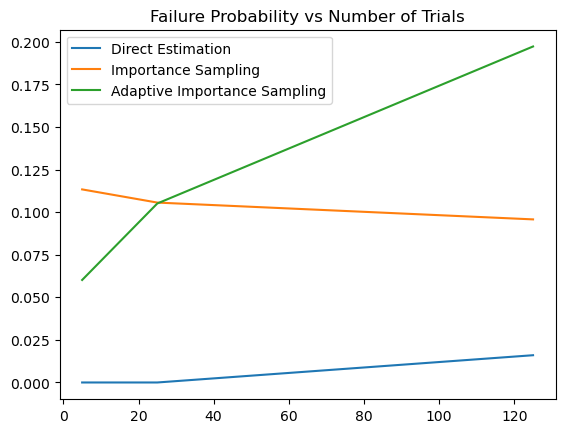

In [15]:
# failure probability graph
pyplot.plot(results_de['n'], results_de['p_fail'])
pyplot.plot(results_ims['n'], results_ims['p_fail'])
pyplot.plot(results_aims['n'], results_aims['p_fail'])
pyplot.legend(["Direct Estimation", "Importance Sampling", "Adaptive Importance Sampling"])
pyplot.title("Failure Probability vs Number of Trials")
pyplot.show()

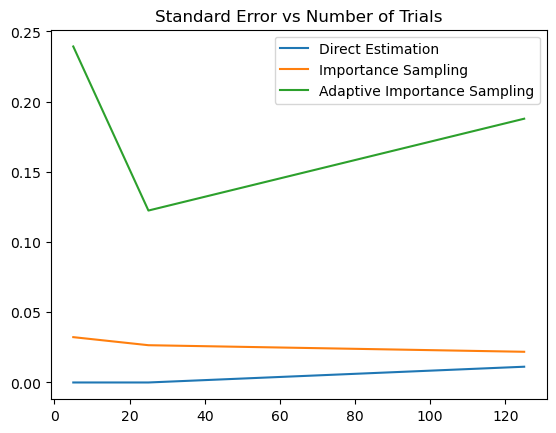

In [16]:
# failure probability graph
pyplot.plot(results_de['n'], results_de['std_error'])
pyplot.plot(results_ims['n'], results_ims['std_error'])
pyplot.plot(results_aims['n'], results_aims['std_error'])
pyplot.legend(["Direct Estimation", "Importance Sampling", "Adaptive Importance Sampling"])
pyplot.title("Standard Error vs Number of Trials")
pyplot.show()

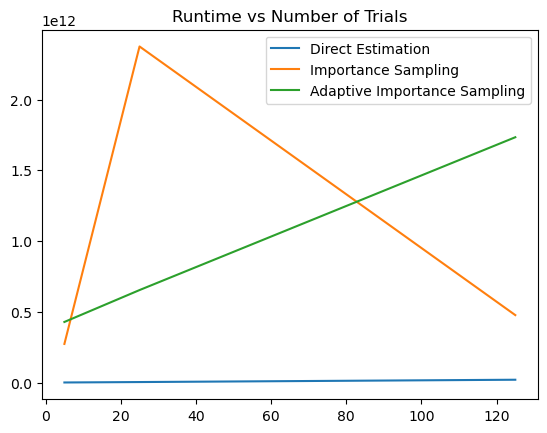

In [17]:
# failure probability graph
pyplot.plot(results_de['n'], results_de['runtime'])
pyplot.plot(results_ims['n'], results_ims['runtime'])
pyplot.plot(results_aims['n'], results_aims['runtime'])
pyplot.legend(["Direct Estimation", "Importance Sampling", "Adaptive Importance Sampling"])
pyplot.title("Runtime vs Number of Trials")
pyplot.show()